In [685]:
import pandas as pd
import numpy as np
import statsmodels. formula.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [686]:
df = pd.read_excel('IBM Employee Attrition.xlsx')

In [687]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [688]:
         # IBM Employee Attrition
    #Data prep and cleaning 

In [701]:
df['Attrition'].replace(['No','Yes'], [0, 1], inplace =True)

In [702]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [704]:
# there is no missing data in the dataset

In [705]:
df.shape

(1470, 30)

In [706]:
# finding outliers
dfz = df.copy()
print(dfz.shape)

(1470, 30)


In [707]:
dfz['zscore_Age'] = np.abs(stats.zscore(df['Age']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676


In [708]:
z_outliers = dfz.loc[dfz['zscore_Age'] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [709]:
#there is no outliers in Age

In [710]:
dfz['zscore_DistanceFromHome'] = np.abs(stats.zscore(df['DistanceFromHome']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515


In [711]:
z_outliers = dfz.loc[dfz['zscore_DistanceFromHome'] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [712]:
# there is no outliers in DistanceFromHome

In [713]:
dfz['zscore_MonthlyIncome'] = np.abs(stats.zscore(dfz['MonthlyIncome']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858


In [714]:
z_outliers = dfz.loc[dfz['zscore_MonthlyIncome'] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [715]:
#there is no outliers for MonthlyIncome

In [716]:
dfz['zscore_NumCompaniesWorked']  = np.abs(stats.zscore(df['NumCompaniesWorked']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591


In [717]:
z_outliears = dfz.loc[dfz['NumCompaniesWorked'] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [718]:
#there is no outliers for NumCompaniesWorked

In [719]:
dfz['zscore_PercentSalaryHike'] = np.abs(stats.zscore(df['PercentSalaryHike']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232


In [720]:
z_outliers = dfz.loc[dfz['PercentSalaryHike'] < -3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [721]:
#there is no outliers in PercentSalaryHike

In [722]:
dfz['zscore_StockOptionLevel'] = np.abs(stats.zscore(df['StockOptionLevel']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554,0.932014
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306,0.241988
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267,0.932014
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554,0.932014
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232,0.241988


In [723]:
z_outliers = dfz.loc[dfz['StockOptionLevel'] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [724]:
#there is no outliers for StockOptionLevel

In [725]:
dfz['zscore_TotalWorkingYears'] = np.abs(stats.zscore(df['TotalWorkingYears']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel,zscore_TotalWorkingYears
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554,0.932014,0.421642
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306,0.241988,0.164511
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267,0.932014,0.550208
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554,0.932014,0.421642
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232,0.241988,0.678774


In [726]:
z_outliers = dfz.loc[dfz['TotalWorkingYears'] < -3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [727]:
#there is no outliers for TotalWorkingYears

In [728]:
dfz['zscore_TrainingTimesLastYear'] = np.abs(stats.zscore(df['TrainingTimesLastYear']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554,0.932014,0.421642,2.171982
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306,0.241988,0.164511,0.155707
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267,0.932014,0.550208,0.155707
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554,0.932014,0.421642,0.155707
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232,0.241988,0.678774,0.155707


In [729]:
z_outliers = dfz.loc[dfz['TrainingTimesLastYear'] < -3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [730]:
#there is no outliers for the TrainingTimesLastYear

In [731]:
dfz['zscore_YearsAtCompany'] = np.abs(stats.zscore(df['YearsAtCompany']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554,0.932014,0.421642,2.171982,0.164613
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306,0.241988,0.164511,0.155707,0.488508
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267,0.932014,0.550208,0.155707,1.144294
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554,0.932014,0.421642,0.155707,0.161947
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232,0.241988,0.678774,0.155707,0.817734


In [732]:
z_outliers = dfz.loc[df['YearsAtCompany'] < -3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [733]:
#there is no outliers for YearsAtCompany

In [734]:
dfz['zscore_YearsInCurrentRole'] = np.abs(stats.zscore(df['YearsInCurrentRole']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554,0.932014,0.421642,2.171982,0.164613,0.063296
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306,0.241988,0.164511,0.155707,0.488508,0.764998
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267,0.932014,0.550208,0.155707,1.144294,1.167687
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554,0.932014,0.421642,0.155707,0.161947,0.764998
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232,0.241988,0.678774,0.155707,0.817734,0.615492


In [735]:
z_outliers = dfz.loc[dfz['YearsInCurrentRole'] < -3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [736]:
#there is no outliers for YearsInCurrentRole

In [737]:
dfz['zscore_YearsSinceLastPromotion'] = np.abs(stats.zscore(dfz['YearsSinceLastPromotion']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285


In [738]:
z_outliers = dfz.loc[dfz['YearsSinceLastPromotion'] < -3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [739]:
# there is no outliers for YearsSinceLastPromotion

In [740]:
dfz['zscore_YearsWithCurrManager'] = np.abs(stats.zscore(dfz['YearsWithCurrManager']))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Age,zscore_DistanceFromHome,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion,zscore_YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.446350,1.010909,0.108350,2.125136,1.150554,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,1.322365,0.147150,0.291719,0.678049,2.129306,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.008343,0.887515,0.937654,1.324226,0.057267,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.429664,0.764121,0.763634,0.678049,1.150554,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,1.086676,0.887515,0.644858,2.525591,0.877232,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227


In [741]:
z_outliers = dfz.loc[dfz['YearsWithCurrManager'] < -3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [742]:
# there is no outliers for YearsWithCurrManager

In [743]:
# Exploratory data analysis,determining features of all dats

In [744]:
df['Age'].max()

60

In [745]:
df['Age'].min()

18

In [746]:
df['Age'].mean()

36.923809523809524

In [747]:
df['Age'].median()

36.0

In [748]:
df['Age'].mode()

0    35
dtype: int64

In [749]:
Age_range = df['Age'].max() - df['Age'].min()

In [750]:
print(Age_range)

42


In [751]:
df['DistanceFromHome'].max()

29

In [752]:
df['DistanceFromHome'].min()

1

In [753]:
df['DistanceFromHome'].mean()

9.19251700680272

In [754]:
df['DistanceFromHome'].median()

7.0

In [755]:
df['DistanceFromHome'].mode()

0    2
dtype: int64

In [756]:
D_range = df['DistanceFromHome'].max() - df['DistanceFromHome'].min()
print(D_range)

28


In [757]:
df['MonthlyIncome'].max()

19999

In [758]:
df['MonthlyIncome'].min()

1009

In [759]:
df['MonthlyIncome'].mean()

6502.931292517007

In [760]:
df['MonthlyIncome'].median()

4919.0

In [761]:
df['MonthlyIncome'].mode()

0    2342
dtype: int64

In [762]:
 Mon_range = df['MonthlyIncome'].max() - df['MonthlyIncome'].min()
print(Mon_range)

18990


In [763]:
df['PercentSalaryHike'].max()

25

In [764]:
df['NumCompaniesWorked'].max()

9

In [765]:
df['NumCompaniesWorked'].min()

0

In [766]:
df['NumCompaniesWorked'].mean()

2.6931972789115646

In [767]:
df['NumCompaniesWorked'].median()

2.0

In [768]:
df['NumCompaniesWorked'].mode()

0    1
dtype: int64

In [769]:
N_range = df['NumCompaniesWorked'].max() - df['NumCompaniesWorked'].min()
print(N_range)

9


In [770]:
df['PercentSalaryHike'].min()

11

In [771]:
df['PercentSalaryHike'].mean()

15.209523809523809

In [772]:
df['PercentSalaryHike'].median()

14.0

In [773]:
df['PercentSalaryHike'].mode()

0    11
dtype: int64

In [774]:
Pc_range = df['PercentSalaryHike'].max() - df['PercentSalaryHike'].min()
print(Pc_range)

14


In [775]:
df['TotalWorkingYears'].max()

40

In [776]:
df['TotalWorkingYears'].min()

0

In [777]:
df['TotalWorkingYears'].mean()

11.279591836734694

In [778]:
df['TotalWorkingYears'].median()

10.0

In [779]:
df['TotalWorkingYears'].mode()

0    10
dtype: int64

In [780]:
To_range = df['TotalWorkingYears'].max() - df['TotalWorkingYears'].min()
print(To_range)

40


In [781]:
df['TrainingTimesLastYear'].max()

6

In [782]:
df['TrainingTimesLastYear'].min()

0

In [783]:
df['TrainingTimesLastYear'].mean()

2.7993197278911564

In [784]:
df['TrainingTimesLastYear'].median()

3.0

In [785]:
df['TrainingTimesLastYear'].mode()

0    2
dtype: int64

In [786]:
Tr_range = df['TrainingTimesLastYear'].max() - df['TrainingTimesLastYear'].min()
print(Tr_range)                                                 

6


In [787]:
df['YearsAtCompany'].max()

40

In [788]:
df['YearsAtCompany'].min()

0

In [789]:
df['YearsAtCompany'].mean()

7.0081632653061225

In [790]:
df['YearsAtCompany'].median()

5.0

In [791]:
df['YearsAtCompany'].mode()

0    5
dtype: int64

In [792]:
Y_range = df['YearsAtCompany'].max() - df['YearsAtCompany'].min()
print(Y_range)

40


In [793]:
df['YearsInCurrentRole'].max()

18

In [794]:
df['YearsInCurrentRole'].min()

0

In [795]:
df['YearsInCurrentRole'].mean()

4.229251700680272

In [796]:
df['YearsInCurrentRole'].median()

3.0

In [797]:
df['YearsInCurrentRole'].mode()

0    2
dtype: int64

In [798]:
Y_range = df['YearsInCurrentRole'].max() - df['YearsInCurrentRole'].min()
print(Y_range)

18


In [799]:
df['YearsSinceLastPromotion'].max()

15

In [800]:
df['YearsSinceLastPromotion'].min()

0

In [801]:
df['YearsSinceLastPromotion'].mean()

2.1877551020408164

In [802]:
df['YearsSinceLastPromotion'].median()

1.0

In [803]:
df['YearsSinceLastPromotion'].mode()

0    0
dtype: int64

In [804]:
Y_range = df['YearsSinceLastPromotion'].max() - df['YearsSinceLastPromotion'].min()
print(Y_range)

15


In [805]:
df['YearsWithCurrManager'].max()

17

In [806]:
df['YearsWithCurrManager'].min()

0

In [807]:
df['YearsWithCurrManager'].mean()

4.12312925170068

In [808]:
df['YearsWithCurrManager'].median()

3.0

In [809]:
Y_range = df['YearsWithCurrManager'].max() - df['YearsWithCurrManager'].min()

In [810]:
    #relationship between variables
    

In [811]:
pd.crosstab(df['BusinessTravel'], df['Education'])

Education,1,2,3,4,5
BusinessTravel,,,,,
Non-Travel,15,36,49,45,5
Travel_Frequently,37,46,113,71,10
Travel_Rarely,118,200,410,282,33


In [812]:
pd.crosstab(df['Gender'], df['JobRole'])

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Gender,,,,,,,,,
Female,51,16,85,47,72,33,114,132,38
Male,80,36,174,55,73,47,178,194,45


In [813]:
pd.crosstab(df['JobLevel'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
JobLevel,,,,
1,106,108,162,167
2,102,97,163,172
3,50,37,64,67
4,21,22,28,35
5,10,16,25,18


In [814]:
pd.crosstab(df['JobInvolvement'], df['RelationshipSatisfaction'])

RelationshipSatisfaction,1,2,3,4
JobInvolvement,,,,
1,17,18,25,23
2,73,85,115,102
3,157,176,276,259
4,29,24,43,48


In [815]:
pd.crosstab(df['JobRole'], df['PerformanceRating'])

PerformanceRating,3,4
JobRole,,
Healthcare Representative,111,20
Human Resources,45,7
Laboratory Technician,217,42
Manager,82,20
Manufacturing Director,118,27
Research Director,72,8
Research Scientist,243,49
Sales Executive,285,41
Sales Representative,71,12


In [816]:
pd.crosstab(df['MaritalStatus'], df['WorkLifeBalance'])

WorkLifeBalance,1,2,3,4
MaritalStatus,,,,
Divorced,13,88,194,32
Married,42,153,405,73
Single,25,103,294,48


In [817]:
pd.crosstab(df['WorkLifeBalance'], df['Gender'])

Gender,Female,Male
WorkLifeBalance,,
1,30,50
2,136,208
3,365,528
4,57,96


In [818]:
pd.crosstab(df['EnvironmentSatisfaction'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
EnvironmentSatisfaction,,,,
1,53,47,100,84
2,55,59,84,89
3,94,87,128,144
4,87,87,130,142


In [819]:
# finding relationships between Attrition and other numerical variables

In [820]:
df['Age'].groupby(df['Attrition']).mean()

Attrition
0    37.561233
1    33.607595
Name: Age, dtype: float64

In [821]:
df['DistanceFromHome'].groupby(df['Attrition']).mean()

Attrition
0     8.915653
1    10.632911
Name: DistanceFromHome, dtype: float64

In [822]:
df['MonthlyIncome'].groupby(df['Attrition']).mean()

Attrition
0    6832.739659
1    4787.092827
Name: MonthlyIncome, dtype: float64

In [823]:
df['NumCompaniesWorked'].groupby(df['Attrition']).mean()

Attrition
0    2.645580
1    2.940928
Name: NumCompaniesWorked, dtype: float64

In [824]:
df['PercentSalaryHike'].groupby(df['Attrition']).mean()

Attrition
0    15.231144
1    15.097046
Name: PercentSalaryHike, dtype: float64

In [825]:
df['StockOptionLevel'].groupby(df['Attrition']).mean()

Attrition
0    0.845093
1    0.527426
Name: StockOptionLevel, dtype: float64

In [826]:
df['TotalWorkingYears'].groupby(df['Attrition']).mean()

Attrition
0    11.862936
1     8.244726
Name: TotalWorkingYears, dtype: float64

In [827]:
df['TrainingTimesLastYear'].groupby(df['Attrition']).mean()

Attrition
0    2.832928
1    2.624473
Name: TrainingTimesLastYear, dtype: float64

In [828]:
df['YearsAtCompany'].groupby(df['Attrition']).mean()

Attrition
0    7.369019
1    5.130802
Name: YearsAtCompany, dtype: float64

In [829]:
df['YearsInCurrentRole'].groupby(df['Attrition']).mean()

Attrition
0    4.484185
1    2.902954
Name: YearsInCurrentRole, dtype: float64

In [830]:
df['YearsSinceLastPromotion'].groupby(df['Attrition']).mean()

Attrition
0    2.234388
1    1.945148
Name: YearsSinceLastPromotion, dtype: float64

In [831]:
df['YearsWithCurrManager'].groupby(df['Attrition']).mean()

Attrition
0    4.367397
1    2.852321
Name: YearsWithCurrManager, dtype: float64

In [832]:
# how salary differ between gender?

df['MonthlyIncome'].groupby(df['Gender']).mean()

Gender
Female    6686.566327
Male      6380.507937
Name: MonthlyIncome, dtype: float64

In [833]:
# Does time spent in the company differ by job role

df['YearsAtCompany'].groupby(df['JobRole']).mean()

JobRole
Healthcare Representative     8.374046
Human Resources               5.326923
Laboratory Technician         5.019305
Manager                      14.431373
Manufacturing Director        7.600000
Research Director            10.937500
Research Scientist            5.113014
Sales Executive               7.496933
Sales Representative          2.915663
Name: YearsAtCompany, dtype: float64

In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [835]:
 
# use groupby function to determine the relationship between the dependent and independent variables 

Attrition
0    37.561233
1    33.607595
Name: Age, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

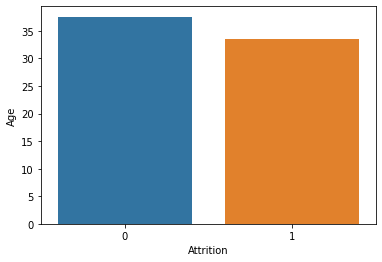

In [868]:

 print(df["Age"].groupby(df["Attrition"]).mean())



sns.barplot(data = df, x = "Attrition", y = "Age", ci = None)     

      
     

      



Attrition
0     8.915653
1    10.632911
Name: DistanceFromHome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

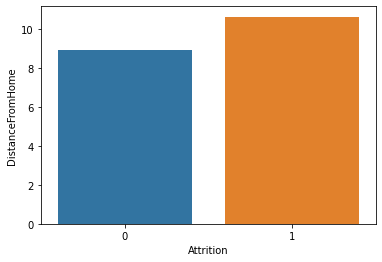

In [879]:
print(df["DistanceFromHome"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "DistanceFromHome", ci = None)     


Attrition
0    6832.739659
1    4787.092827
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

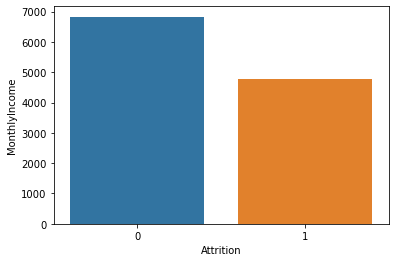

In [880]:
print(df["MonthlyIncome"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "MonthlyIncome", ci = None)     


Attrition
0    2.645580
1    2.940928
Name: NumCompaniesWorked, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

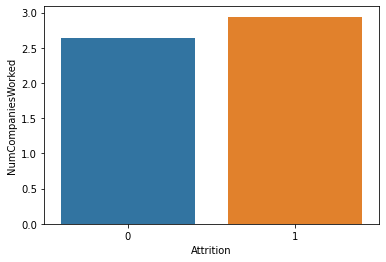

In [872]:
print(df["NumCompaniesWorked"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "NumCompaniesWorked", ci = None)     


Attrition
0    15.231144
1    15.097046
Name: PercentSalaryHike, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

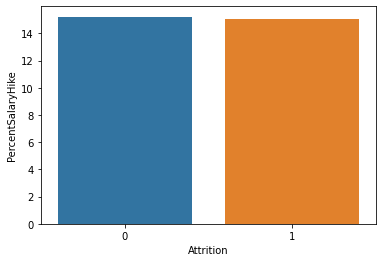

In [873]:
print(df["PercentSalaryHike"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "PercentSalaryHike", ci = None)     


Attrition
0    0.845093
1    0.527426
Name: StockOptionLevel, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

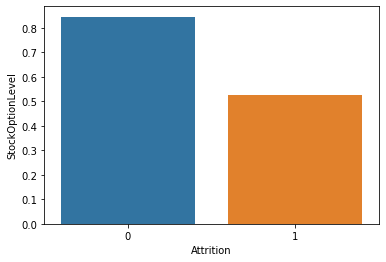

In [874]:
print(df["StockOptionLevel"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "StockOptionLevel", ci = None)     


Attrition
0    11.862936
1     8.244726
Name: TotalWorkingYears, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

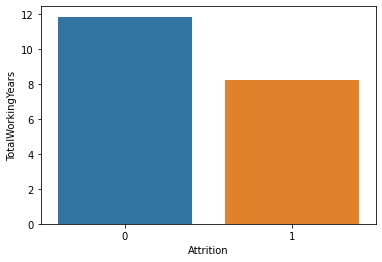

In [881]:
print(df["TotalWorkingYears"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "TotalWorkingYears", ci = None)     


Attrition
0    2.832928
1    2.624473
Name: TrainingTimesLastYear, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

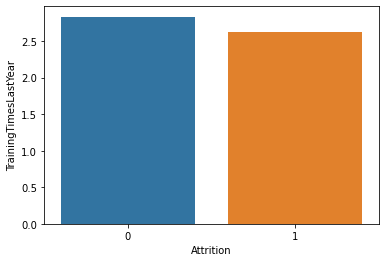

In [876]:
print(df["TrainingTimesLastYear"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "TrainingTimesLastYear", ci = None)     


Attrition
0    7.369019
1    5.130802
Name: YearsAtCompany, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

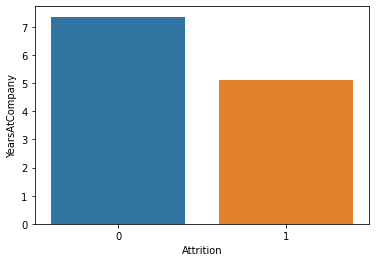

In [878]:
print(df["YearsAtCompany"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "YearsAtCompany", ci = None)     


Attrition
0    4.484185
1    2.902954
Name: YearsInCurrentRole, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

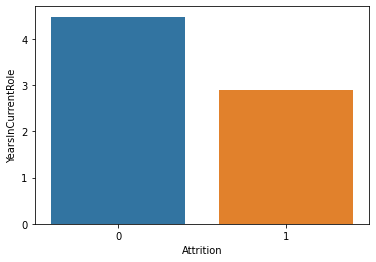

In [845]:
print(df["YearsInCurrentRole"].groupby(df["Attrition"]).mean())



sns.barplot(data = df, x = "Attrition", y = "YearsInCurrentRole", ci = None)     


Attrition
0    2.234388
1    1.945148
Name: YearsSinceLastPromotion, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

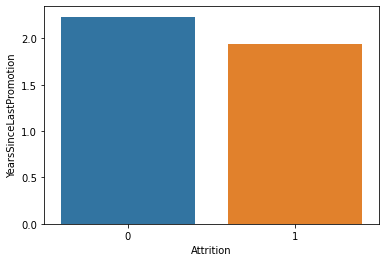

In [882]:
print(df["YearsSinceLastPromotion"].groupby(df["Attrition"]).mean())


sns.barplot(data = df, x = "Attrition", y = "YearsSinceLastPromotion", ci = None)     


Attrition
0    4.367397
1    2.852321
Name: YearsWithCurrManager, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

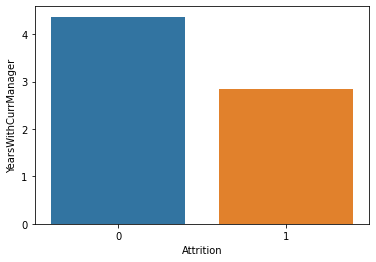

In [883]:
print(df["YearsWithCurrManager"].groupby(df["Attrition"]).mean())

sns.barplot(data = df, x = "Attrition", y = "YearsWithCurrManager", ci = None)     


0    1233
1     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

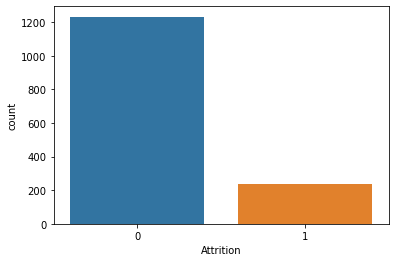

In [889]:
# all independent variables have relationship with the dependent variaable
# next step if preparing the logistic regression model

# check coding of dependent variable
# value code '1'represents the presence of the event

print(df['Attrition'].value_counts())

sns.countplot(data = df, x = 'Attrition')

In [890]:
mod1 = sm.logit('Attrition ~ Age + DistanceFromHome + MonthlyIncome + NumCompaniesWorked + PercentSalaryHike + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data = df).fit() 

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.387656
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                           12
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.1223
Time:                        22:10:39   Log-Likelihood:                -569.85
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.909e-28
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7724      0.508      1.521      0.128      -0.223       1.768
Age                        -0.0329      0.012     -2.814      0.005      -0.056      -0.010
DistanceFromHome            0.0325      0.009      3.595      0.000       0.015       0.050
MonthlyIncome           -8.329e-05    3.1e-05     -2.690      0.007      -0.000   -2.26e-05
NumCompaniesWorked          0.1237      0.032      3.866      0.000       0.061       0.186
PercentSalaryHike          -0.0136      0.021     -0.647      0.518      -0.055       0.028
StockOptionLevel           -0.5172      0.102     -5.056      0.000      -0.718      -0.317
TotalWorkingYears          -0.0302      0.024     -1.257      0.209      -0.077       0.017
TrainingTimesLastYear      -0.1426      0.060     -2.396      0.017      -0.259      -0.026
YearsAtCompany              0.0629      0.033      1.901      0.057      -0.002       0.128
YearsInCurrentRole         -0.1290      0.039     -3.299      0.001      -0.206      -0.052
YearsSinceLastPromotion     0.1417      0.036      3.905      0.000       0.071       0.213
YearsWithCurrManager       -0.1190      0.039     -3.047      0.002      -0.196      -0.042
===========================================================================================
"""

In [891]:
# the variables: percentsalaryhike, totalworkingyears,yearsatcompany have a p-value not meet the cut-off,which is 0.05
#for  each one year increase in age their is probability of decreasing attrition by value of -0.0329
#for each one mile distance increase distancefromhome  their is probaability of increasing attrition  by value of 0.0325
# for each one uint increase in monthlyincome their is probability of decreasing attrition by the value of -8.329e-05.

In [892]:
# print the variables coefficient value

mod1.params

Intercept                  0.772420
Age                       -0.032872
DistanceFromHome           0.032481
MonthlyIncome             -0.000083
NumCompaniesWorked         0.123747
PercentSalaryHike         -0.013585
StockOptionLevel          -0.517170
TotalWorkingYears         -0.030220
TrainingTimesLastYear     -0.142596
YearsAtCompany             0.062937
YearsInCurrentRole        -0.129031
YearsSinceLastPromotion    0.141718
YearsWithCurrManager      -0.119022
dtype: float64

In [893]:
#  Odds Ratio(OR) measure of association between an event and outcomre
#np.exp : calculate exponential of given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])
# pull the p valuee directly
df_odds['pvalue'] = mod1.pvalues
#create variable to determine Sig
df_odds['Sig'] = np.where(df_odds['pvalue'] < 0.05, 'Sig', 'Not Sig')

df_odds



,OR,pvalue,Sig
Intercept,2.164999,1.283288e-01,Not Sig
Age,0.967663,4.892115e-03,Sig
DistanceFromHome,1.033014,3.240309e-04,Sig
MonthlyIncome,0.999917,7.137547e-03,Sig
NumCompaniesWorked,1.131730,1.108610e-04,Sig
PercentSalaryHike,0.986507,5.176853e-01,Not Sig
StockOptionLevel,0.596206,4.278894e-07,Sig
TotalWorkingYears,0.970232,2.086470e-01,Not Sig
TrainingTimesLastYear,0.867104,1.657360e-02,Sig
YearsAtCompany,1.064960,5.726601e-02,Not Sig


In [894]:
# for those variables their OR is greater than 1, for each one unit increase in their value the odds of attrition increase  by the value equal to OR ratio.
## for those variables their OR is less than 1, for each one unit increase in their value the odds of attrition decrease  by the value equal to OR ratio.


In [895]:
# Percentage change(PP) use to explain how change in independent variables influence the dependent variable

df_odds['Pct Change'] = (df_odds['OR'] -1) * 100

df_odds

,OR,pvalue,Sig,Pct Change
Intercept,2.164999,1.283288e-01,Not Sig,116.499939
Age,0.967663,4.892115e-03,Sig,-3.233738
DistanceFromHome,1.033014,3.240309e-04,Sig,3.301413
MonthlyIncome,0.999917,7.137547e-03,Sig,-0.008329
NumCompaniesWorked,1.131730,1.108610e-04,Sig,13.172991
PercentSalaryHike,0.986507,5.176853e-01,Not Sig,-1.349326
StockOptionLevel,0.596206,4.278894e-07,Sig,-40.379429
TotalWorkingYears,0.970232,2.086470e-01,Not Sig,-2.976829
TrainingTimesLastYear,0.867104,1.657360e-02,Sig,-13.289607
YearsAtCompany,1.064960,5.726601e-02,Not Sig,6.495966


In [896]:
# for those variables their pct  change  greater than 0 , for each one unit increase to their value then the odds of attrition  increase by the value equal to their  pct change
# for those variables their pct  change  less than 0 , for each one unit increase to their value then the odds of attrition  decrease by the value equal to their  pct change 

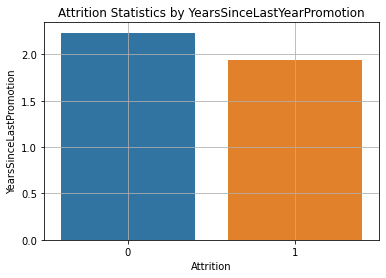

In [897]:
sns.barplot(data = df, x = "Attrition", y = "YearsSinceLastPromotion", ci = None)

plt.title('Attrition Statistics by YearsSinceLastYearPromotion')
plt.grid()

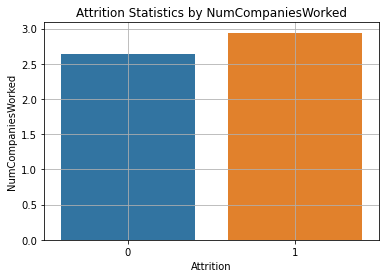

In [898]:
sns.barplot(data = df, x = "Attrition", y = "NumCompaniesWorked", ci = None)

plt.title('Attrition Statistics by NumCompaniesWorked')
plt.grid()

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

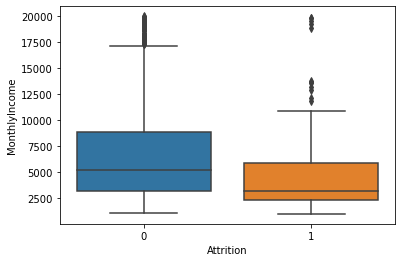

In [899]:
sns.boxplot(x = df["Attrition"], y = df["MonthlyIncome"])